# Resizing the image by tiling and stitching

Original Image


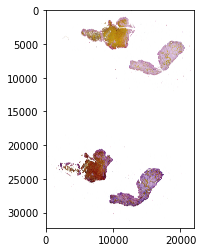

Original image_width 22013   image_height 32269
individual tile_size before resizing: (4402, 6453)


  0%|          | 0/5 [00:00<?, ?it/s]

processing big tile 1
Tile shape: (1172, 800, 4)
processing big tile 2
Tile shape: (1172, 800, 4)
processing big tile 3
Tile shape: (1172, 800, 4)
processing big tile 4
Tile shape: (1172, 800, 4)
processing big tile 5


 20%|██        | 1/5 [00:14<00:56, 14.02s/it]

Tile shape: (1172, 800, 4)
processing big tile 6
Tile shape: (1172, 800, 4)
processing big tile 7
Tile shape: (1172, 800, 4)
processing big tile 8
Tile shape: (1172, 800, 4)
processing big tile 9
Tile shape: (1172, 800, 4)
processing big tile 10


 40%|████      | 2/5 [00:27<00:40, 13.53s/it]

Tile shape: (1172, 800, 4)
processing big tile 11
Tile shape: (1172, 800, 4)
processing big tile 12
Tile shape: (1172, 800, 4)
processing big tile 13
Tile shape: (1172, 800, 4)
processing big tile 14
Tile shape: (1172, 800, 4)
processing big tile 15


 60%|██████    | 3/5 [00:38<00:24, 12.40s/it]

Tile shape: (1172, 800, 4)
processing big tile 16
Tile shape: (1172, 800, 4)
processing big tile 17
Tile shape: (1172, 800, 4)
processing big tile 18
Tile shape: (1172, 800, 4)
processing big tile 19
Tile shape: (1172, 800, 4)
processing big tile 20


 80%|████████  | 4/5 [00:49<00:11, 11.87s/it]

Tile shape: (1172, 800, 4)
processing big tile 21
Tile shape: (1172, 800, 4)
processing big tile 22
Tile shape: (1172, 800, 4)
processing big tile 23
Tile shape: (1172, 800, 4)
processing big tile 24
Tile shape: (1172, 800, 4)
processing big tile 25


100%|██████████| 5/5 [01:00<00:00, 12.16s/it]

Tile shape: (1172, 800, 4)
showing tiles


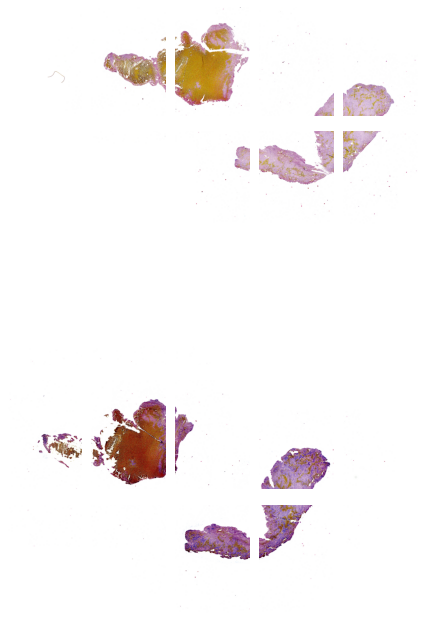

Beginning the stitching process...
First, a placeholder image of shape (5860, 4000, 4)
GRID POSITIONS: 0, 0


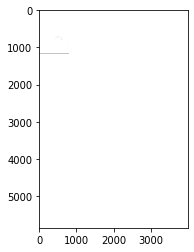

GRID POSITIONS: 1, 0


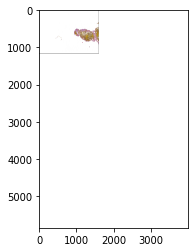

GRID POSITIONS: 2, 0


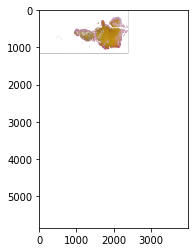

GRID POSITIONS: 3, 0


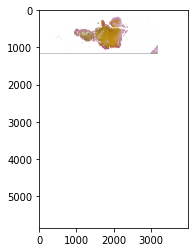

GRID POSITIONS: 4, 0


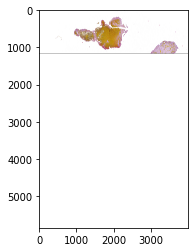

GRID POSITIONS: 0, 1


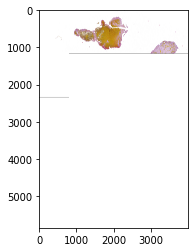

GRID POSITIONS: 1, 1


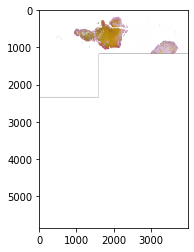

GRID POSITIONS: 2, 1


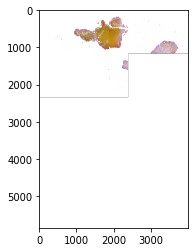

GRID POSITIONS: 3, 1


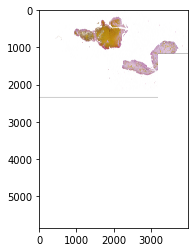

GRID POSITIONS: 4, 1


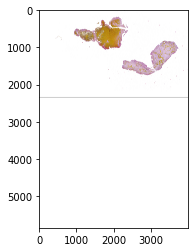

GRID POSITIONS: 0, 2


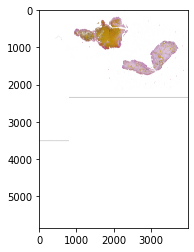

GRID POSITIONS: 1, 2


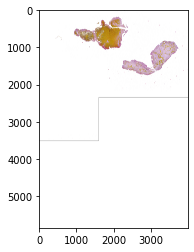

GRID POSITIONS: 2, 2


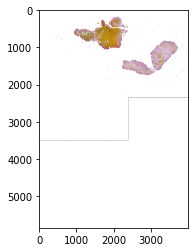

GRID POSITIONS: 3, 2


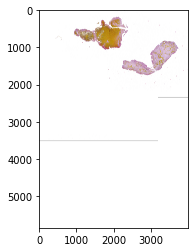

GRID POSITIONS: 4, 2


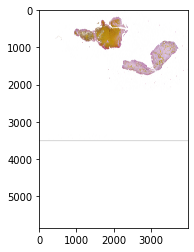

GRID POSITIONS: 0, 3


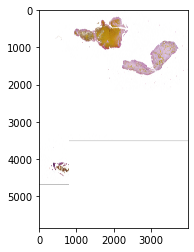

GRID POSITIONS: 1, 3


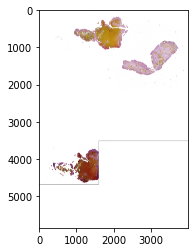

GRID POSITIONS: 2, 3


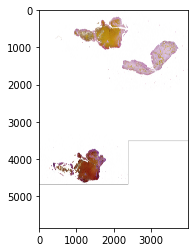

GRID POSITIONS: 3, 3


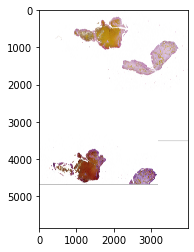

GRID POSITIONS: 4, 3


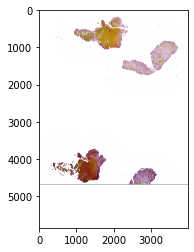

GRID POSITIONS: 0, 4


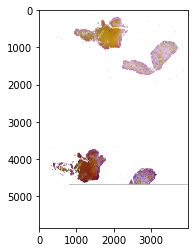

GRID POSITIONS: 1, 4


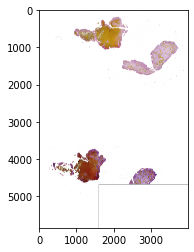

GRID POSITIONS: 2, 4


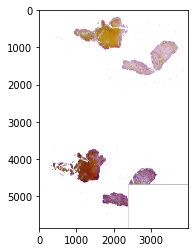

GRID POSITIONS: 3, 4


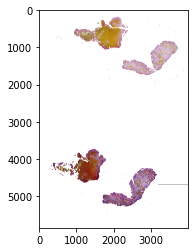

GRID POSITIONS: 4, 4


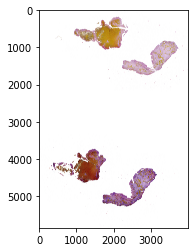

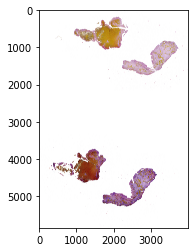

In [22]:
def resize(row, horizontal_size=4000, cutoff_size=3500000000, tiles_per_side=5):
    
    image_path=row.image_path
    image_width=row.image_width
    image_height=row.image_height
    
    if row.image_pixels<cutoff_size:
        orig_image = np.array(cv2.imread(row.image_path))
        orig_image = cv2.cvtColor(orig_image, cv2.COLOR_RGB2BGR)        
        print('Original Image')
        plt.imshow(orig_image); plt.show()
        print('='*100)
        

    tile_size=(int(image_width/tiles_per_side),int(image_height/tiles_per_side))
    h_size=int(horizontal_size/tiles_per_side) 
    v_size=int(h_size/row.aspect_ratio)        
    
    slide=OpenSlide(image_path) 
    print(f'Original image_width {image_width}   image_height {image_height}')
    print(f'individual tile_size before resizing: {tile_size}')
    tiles=[]
    big_tile_number=1
    for v in tqdm(range(0,image_height-tile_size[1]+1,tile_size[1])): 
        for h in range(0,image_width-tile_size[0]+1,tile_size[0]):
            print('processing big tile', big_tile_number)
            image = slide.read_region((h,v),0, tile_size)  
            image = np.array(image)
            image = cv2.resize(image, dsize=(h_size,v_size), interpolation=cv2.INTER_NEAREST) 
            tiles.append(image)
            big_tile_number+=1
            print('Tile shape:', image.shape)
            
    print('showing tiles')
    fig, ax = plt.subplots(nrows = tiles_per_side,ncols = tiles_per_side, figsize = (6,6/row.aspect_ratio))
    for i,t in enumerate(tiles):
        x_grid=int(i/tiles_per_side)            
        y_grid=i%tiles_per_side
        ax[x_grid,y_grid].imshow(t)
        ax[x_grid,y_grid].axis('off')
    fig.tight_layout()
    plt.show()
        
    stitched = np.array(Image.new('RGBA', (h_size*tiles_per_side, v_size*tiles_per_side)))
    
    print('Beginning the stitching process...')
    print('First, a placeholder image of shape', stitched.shape)
    
    for pos, individual_tile in enumerate(tiles):
            x_grid=pos%tiles_per_side
            y_grid=int(pos/tiles_per_side)
            print(f'GRID POSITIONS: {x_grid}, {y_grid}')
            stitched[
                     y_grid*v_size:y_grid*v_size+v_size,
                     x_grid*h_size:x_grid*h_size+h_size,                
                    :] = individual_tile              
            plt.imshow(stitched)
            plt.show()
            print('='*100)         
    return stitched

row=train_csv.loc[250]
print('='*100)
img = resize(row, tiles_per_side=5)
print('='*100)
plt.imshow(img)
plt.show()

In [23]:
def tiling(img, tile_size=224):
    tiles=[]
    ctr=0
    horizontal_tiles=img.shape[1]//tile_size 
    vertical_tiles  =img.shape[0]//tile_size 
    for gridrow in range(vertical_tiles):
        for gridcol in range(horizontal_tiles):
            row_start=gridrow*tile_size
            row_end=gridrow*tile_size+tile_size
            col_start=gridcol*tile_size
            col_end=gridcol*tile_size+tile_size
            ctr=ctr+1
            tile=img[row_start:row_end,
                     col_start:col_end,
                     :]
            tiles.append(tile)
    fig, ax = plt.subplots(vertical_tiles, horizontal_tiles, figsize = (3*horizontal_tiles,3*vertical_tiles))        
    for i,t in enumerate(tiles):
        row_pos=int(i/horizontal_tiles)
        col_pos=i%horizontal_tiles            
        ax[row_pos,col_pos].imshow(t)
    fig.tight_layout()
    plt.show()
        
    return np.array(tiles)

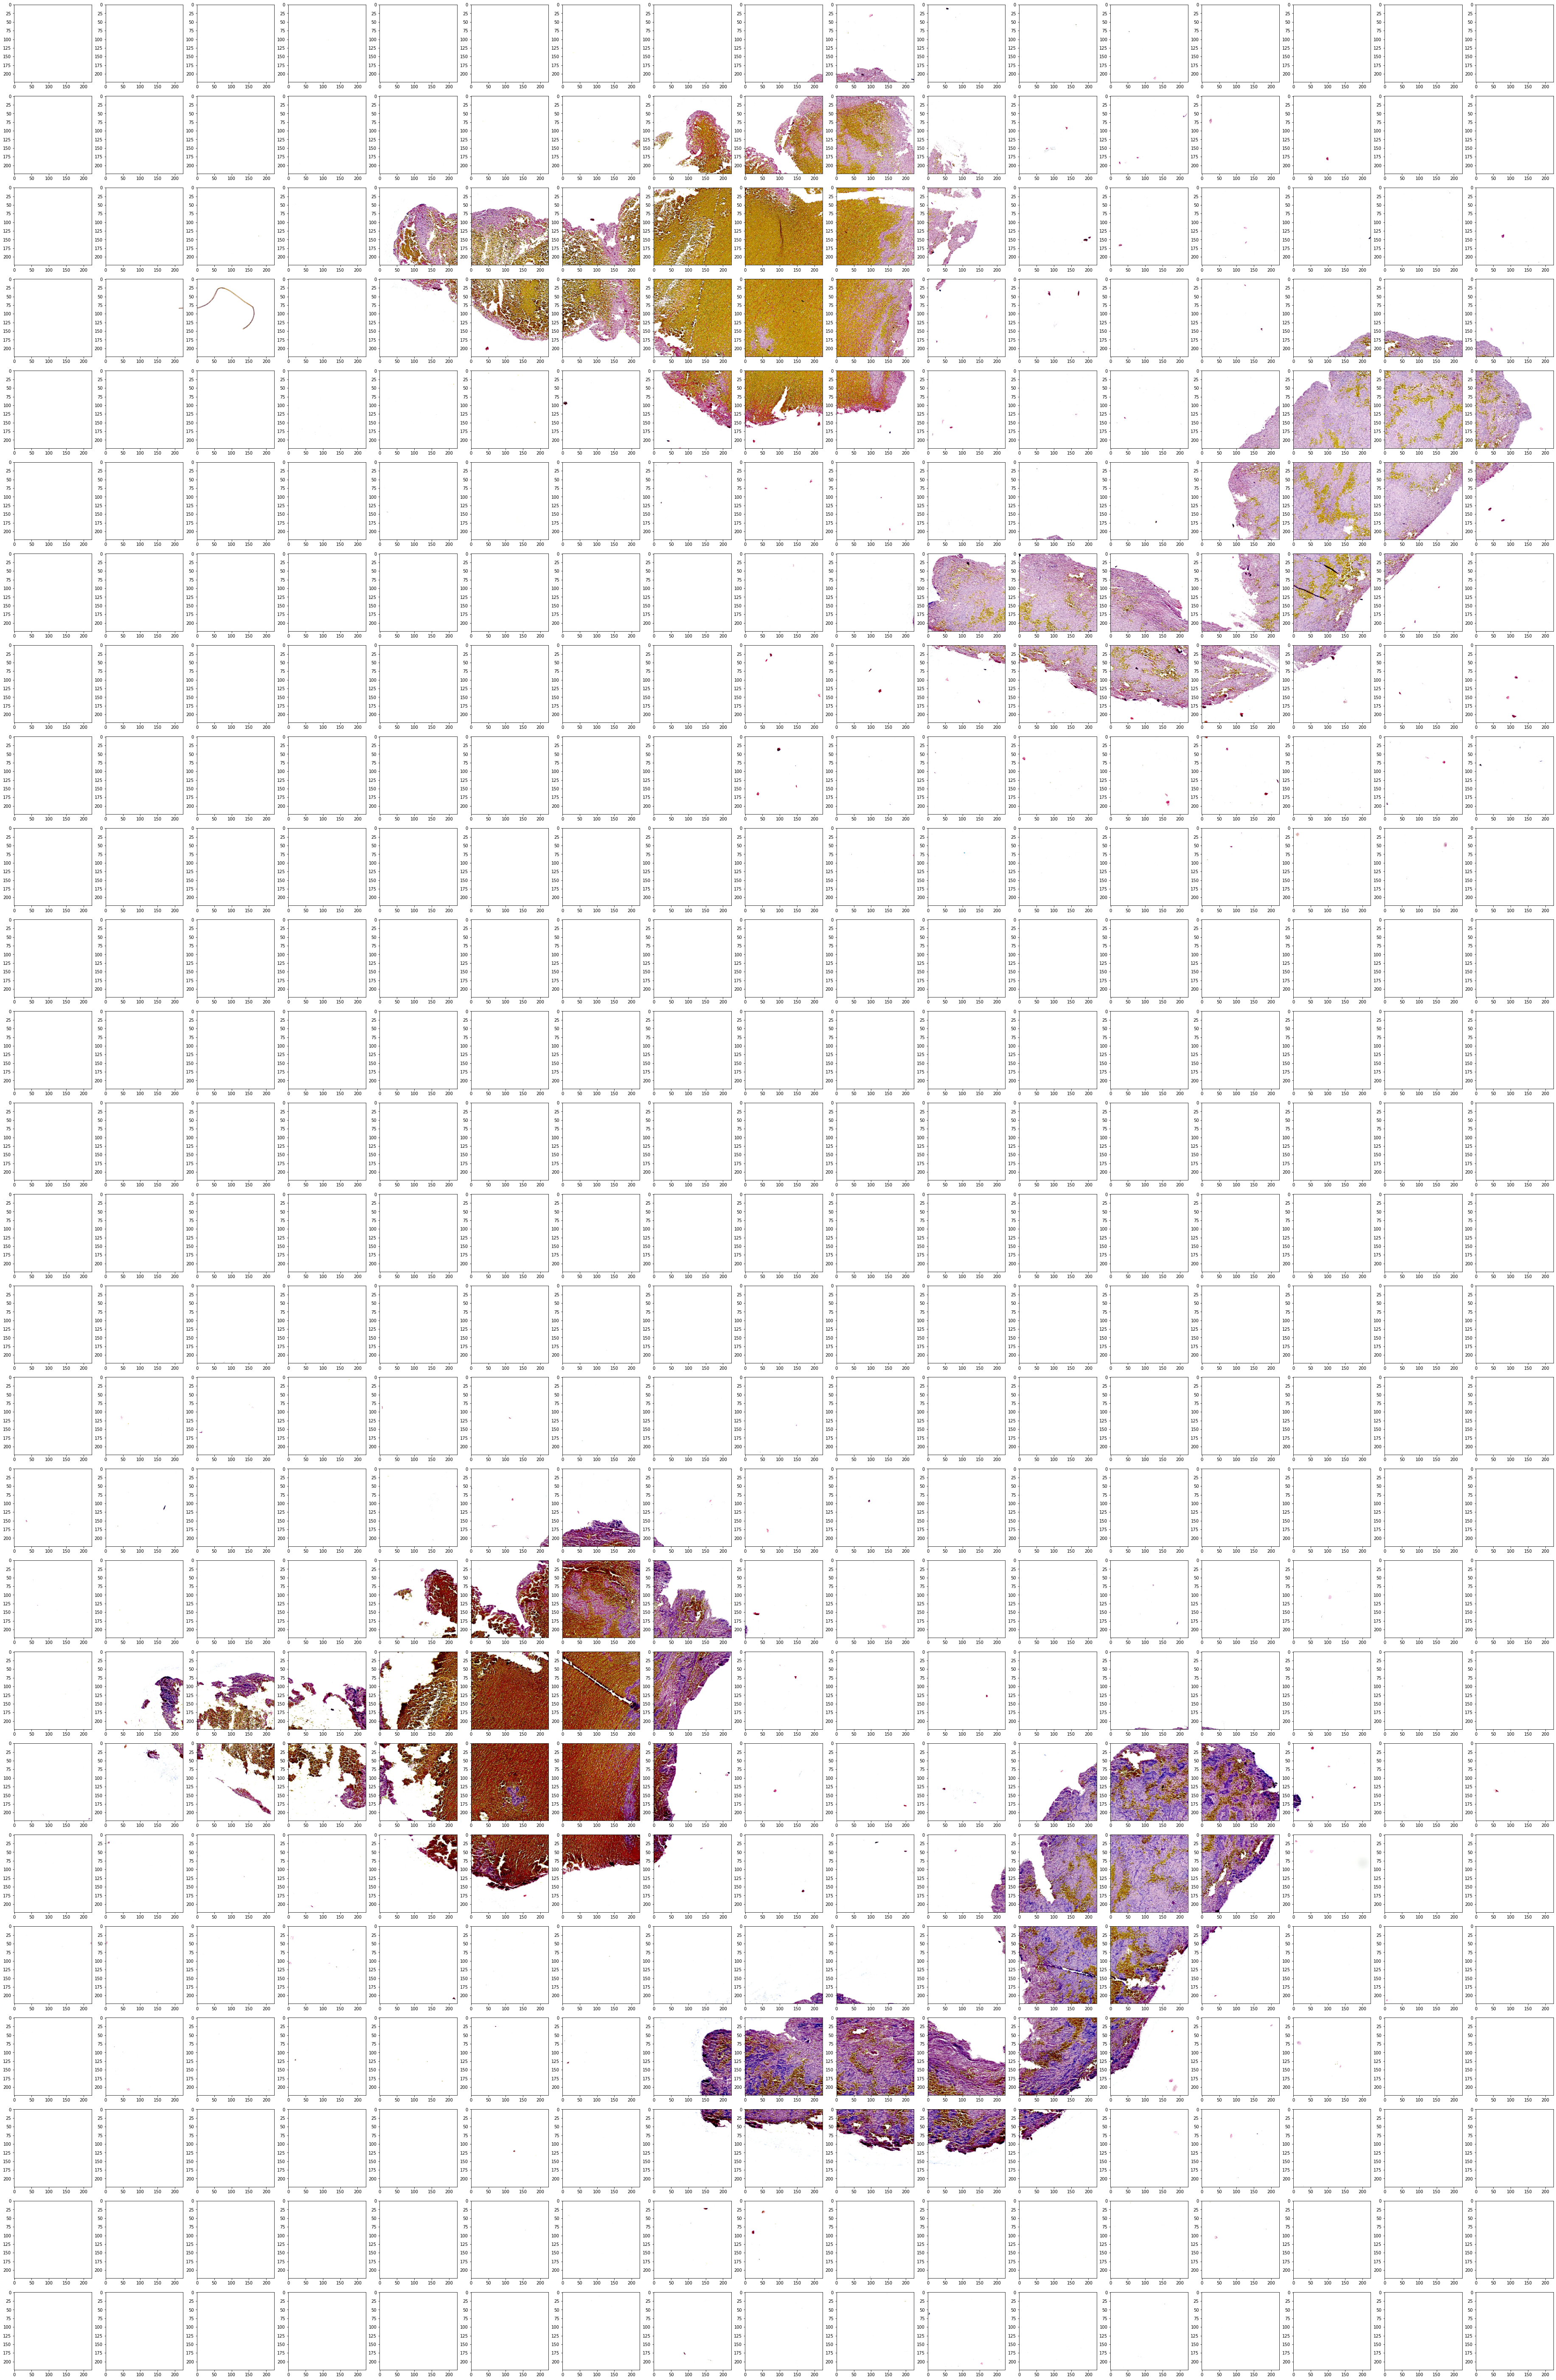

In [24]:
tiles=tiling(img, tile_size=224)

In [29]:
def filter(tiles, n=2):
        
    coeffs_of_variation=[]    
    for idx in range(tiles.shape[0]):
        image= tiles[idx]
        grayValue = 0.07 * image[:,:,2] + 0.72 * image[:,:,1] + 0.21 * image[:,:,0]
        grey_img = grayValue.astype(np.uint8)
        sd = np.std(grey_img)
        print(f'For this tile, calculated sd {sd}')
        if sd==0: 
            cov=0 
        else:     
            cov = sd/np.mean(grey_img)
        coeffs_of_variation.append(cov)
        
    if max(coeffs_of_variation)==0: 
        return [tiles[0]],[1e-8]  
    
    non_zero_cov_values=[x for x in coeffs_of_variation if x>0]
    image_level_cov= np.mean(non_zero_cov_values) 
    reasonable_cov = 0.5
    threshold_score = 0.9 + reasonable_cov/(image_level_cov+reasonable_cov) 
    kept_tiles = []
    scores=[]
    
    for tile, cov in zip(tiles, coeffs_of_variation):
        score=cov/(image_level_cov+1e-8)
        print(f'Tile selection process score: {score}, threshold score {threshold_score}, image_level cov {image_level_cov}')
        if score >= threshold_score:
            kept_tiles.append(tile)
            scores.append(score)  
            
    if len(kept_tiles)==0:
        return [tiles[0]],[1e-8]  
           
    score_dict={k:v for v,k in enumerate(scores) }
    sorted_scores=list(score_dict.keys())
    sorted_scores.sort(reverse=True)
    sorted_tiles=[]
    for k in sorted_scores[:n]:
        sorted_tiles.append(kept_tiles[score_dict[k]])
        print(score_dict[k], k)
            
    for tile in sorted_tiles:
        plt.imshow(tile)
        plt.show()
        print(f'Image size')
        print(f'     Width: {img.shape[1]} pixels')
        print(f'    Height: {img.shape[0]} pixels')
            
    return sorted_tiles,sorted_scores[:n]


For this tile, calculated sd 0.0
For this tile, calculated sd 0.0
For this tile, calculated sd 0.0
For this tile, calculated sd 0.1294526742782881
For this tile, calculated sd 0.022318857117166094
For this tile, calculated sd 0.03891414766415725
For this tile, calculated sd 0.16179429777427262
For this tile, calculated sd 0.34751325215916357
For this tile, calculated sd 12.472703961302093
For this tile, calculated sd 33.98172293029071
For this tile, calculated sd 5.632632167651044
For this tile, calculated sd 1.3928768477094398
For this tile, calculated sd 2.5123884467236444
For this tile, calculated sd 0.22405289491460387
For this tile, calculated sd 0.0
For this tile, calculated sd 0.0
For this tile, calculated sd 0.0
For this tile, calculated sd 0.0
For this tile, calculated sd 0.0
For this tile, calculated sd 0.026408897220524582
For this tile, calculated sd 0.1049610701183246
For this tile, calculated sd 0.04806158518799441
For this tile, calculated sd 0.1627743403908256
For this 

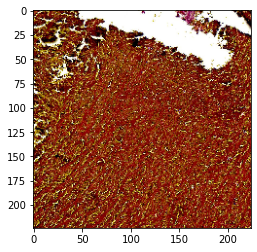

Image size
     Width: 4000 pixels
    Height: 5860 pixels


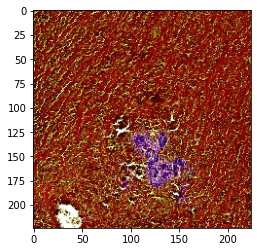

Image size
     Width: 4000 pixels
    Height: 5860 pixels


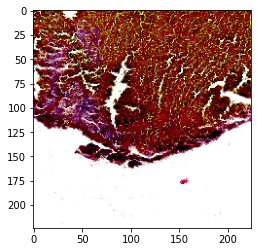

Image size
     Width: 4000 pixels
    Height: 5860 pixels


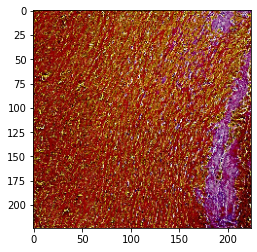

Image size
     Width: 4000 pixels
    Height: 5860 pixels


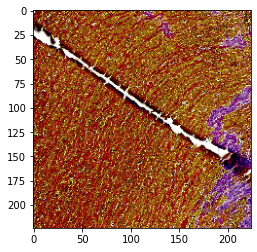

Image size
     Width: 4000 pixels
    Height: 5860 pixels


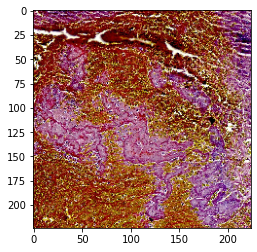

Image size
     Width: 4000 pixels
    Height: 5860 pixels


In [30]:
tiles, scores=filter(tiles, n=6)